In [12]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Load first dataset
data1 = pd.read_csv("../data/mendeley_insurance_claims.csv")

#View first rows
data1.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [14]:
import zipfile

#Unzip file
with zipfile.ZipFile("../data/kaggle_insurance_claims.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("../data/")

#Load extracted csv
data2 = pd.read_csv("../data/Insurance claims data.csv")
data2.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [15]:
#Basic data info

data1.info()
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [16]:
#Handle missing values
#data1
print(data1.isnull().sum()) 

#data2
print(data2.isnull().sum())

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [17]:
# DATA1 CLEANING
#Convert date columns to datetime
data1['policy_bind_date'] = pd.to_datetime(data1['policy_bind_date'])
data1['incident_date'] = pd.to_datetime(data1['incident_date'])

#Drop the _c39 column since it contains all missing values
data1 = data1.drop('_c39', axis=1)

#Fill missing values with 'UNKNOWN'
data1['authorities_contacted'] = data1['authorities_contacted'].fillna('UNKNOWN')

#Check for other missing values
missing_values = data1.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

#Convert object columns to categorical
object_columns = data1.select_dtypes(include=['object']).columns
for col in object_columns:
    data1[col] = data1[col].astype('category')

#Check data types after conversion
print("\nFinal data types:")
print(data1.dtypes)


Missing values per column:
 Series([], dtype: int64)

Final data types:
months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                         category
policy_csl                           category
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                          category
insured_education_level              category
insured_occupation                   category
insured_hobbies                      category
insured_relationship                 category
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                        category
collision_type                       category
incident

In [18]:
# DATA2 CLEANING
#Convert object columns to appropriate types
# First, identify which object columns
categorical_cols = ['region_code', 'segment', 'model', 'fuel_type', 'engine_type', 
                    'max_torque', 'max_power', 'transmission_type', 'steering_type',
                    'rear_brakes_type']

#Convert yes/no columns to binary (1/0)
binary_cols = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
               'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
               'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
               'is_power_door_locks', 'is_central_locking', 'is_power_steering',
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
               'is_ecw', 'is_speed_alert']

#Convert policy_id to string
data2['policy_id'] = data2['policy_id'].astype(str)

#Convert object to categorical columns
for col in categorical_cols:
    data2[col] = data2[col].astype('category')

#Convert binary yes/no columns to 1/0
for col in binary_cols:
    data2[col] = data2[col].map({'Yes': 1, 'No': 0})
    # Handle any NaN values
    if data2[col].isna().any():
        print(f"Warning: NaN values found in {col}")
    
#Check for missing values
missing_values = data2.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

#Check data types after conversion
print("\nData types after conversion:")
print(data1.dtypes)


Missing values per column:
 Series([], dtype: int64)

Data types after conversion:
months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                         category
policy_csl                           category
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                          category
insured_education_level              category
insured_occupation                   category
insured_hobbies                      category
insured_relationship                 category
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                        category
collision_type                       catego

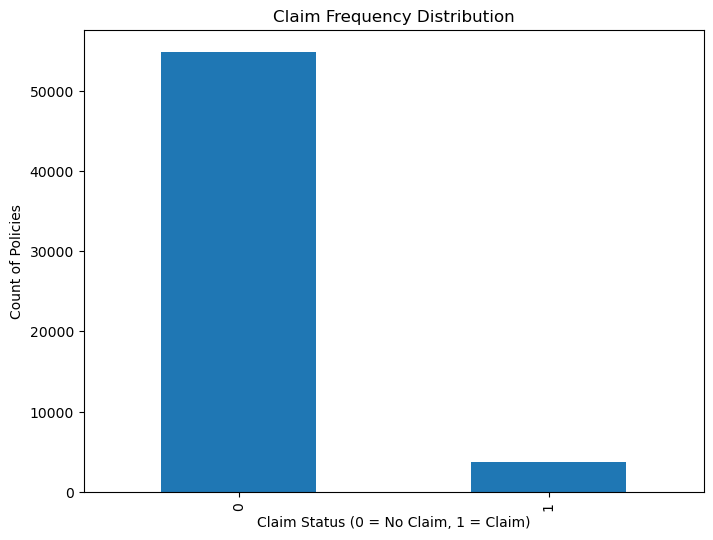

Claim frequency: 6.40%


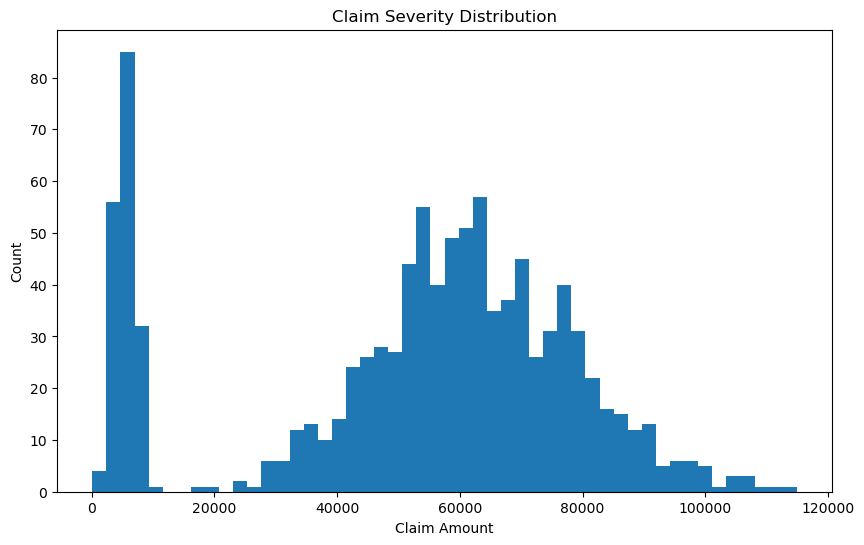

In [21]:
#Basic exploratory data analysis (EDA)

#Claim frequency analysis using data2
plt.figure(figsize=(8, 6))
data2['claim_status'].value_counts().plot(kind='bar')
plt.title("Claim Frequency Distribution")
plt.xlabel("Claim Status (0 = No Claim, 1 = Claim)")
plt.ylabel("Count of Policies")
plt.show()

#Calculate overall claim frequency percentage
claim_frequency = data2['claim_status'].mean() * 100
print(f"Claim frequency: {claim_frequency:.2f}%")

# plot severity distribution (data1)
plt.figure(figsize=(10, 6))
plt.hist(data1['total_claim_amount'], bins=50)
plt.title("Claim Severity Distribution")
plt.xlabel("Claim Amount")
plt.ylabel("Count")
plt.show()


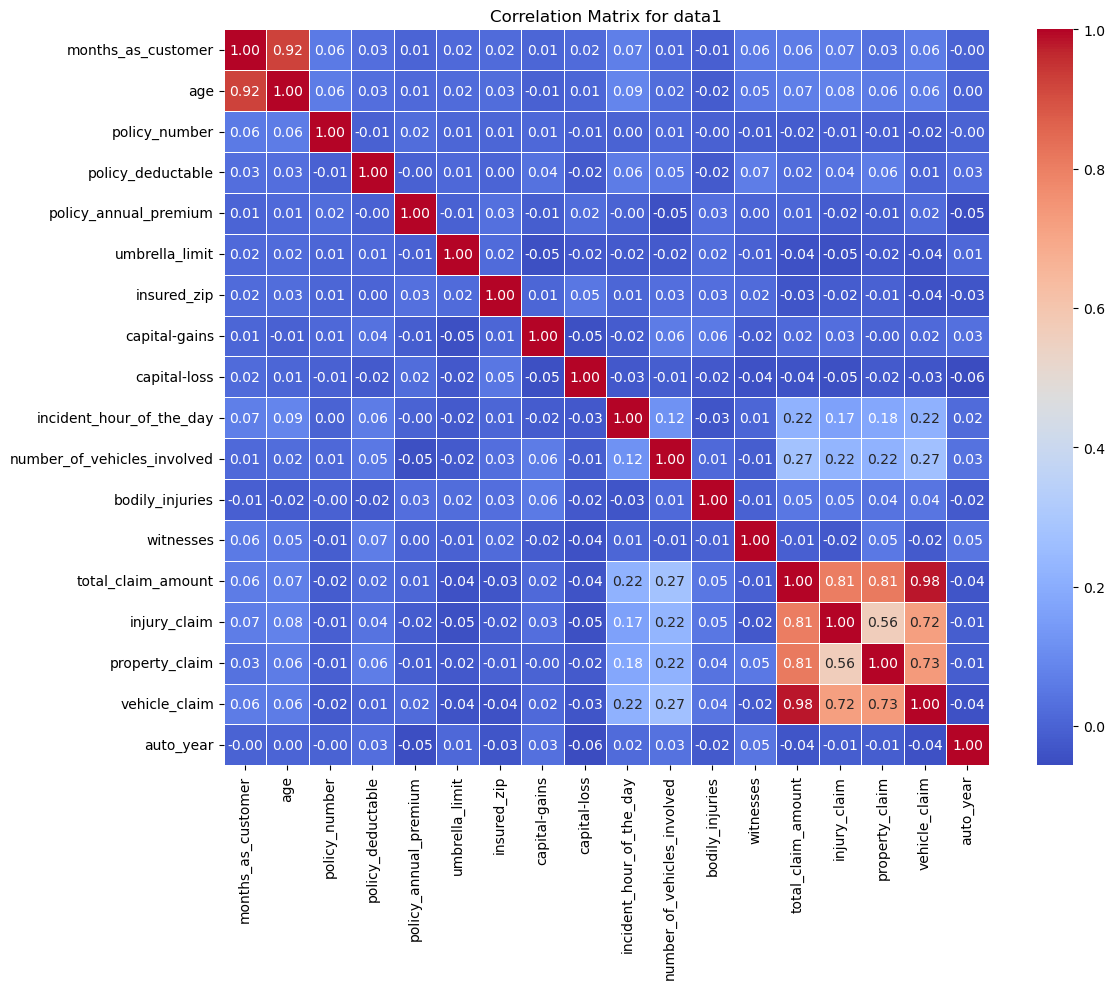

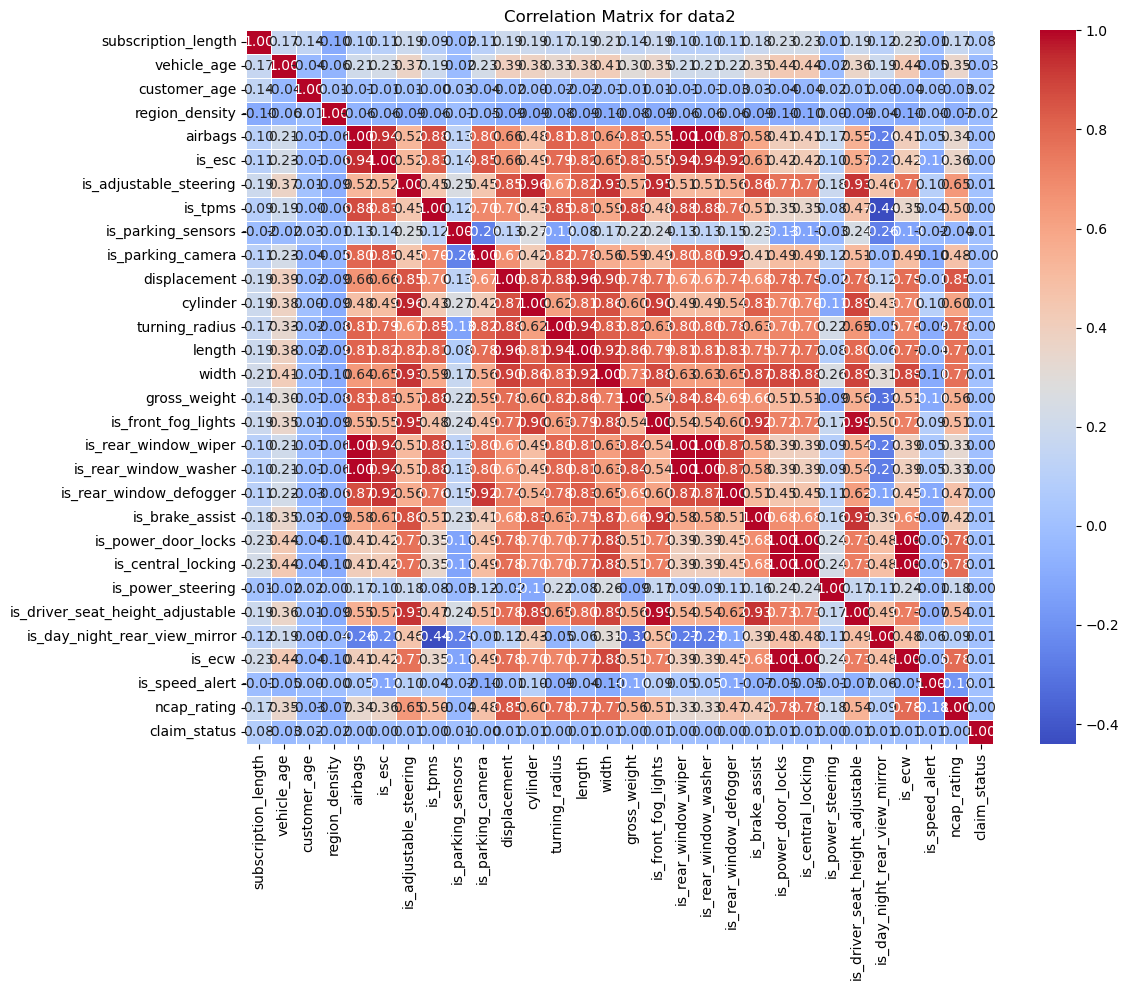

In [22]:
#Correlation analysis for data1
#Numeric columns for correlation analysis
numeric_cols_data1 = data1.select_dtypes(include=['int64', 'float64'])

#Calculate correlation matrix
corr_matrix_data1 = numeric_cols_data1.corr()

#Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_data1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for data1')
plt.tight_layout()
plt.show()

# For data2
#Numeric columns for correlation analysis
numeric_cols_data2 = data2.select_dtypes(include=['int64', 'float64'])

#Calculate correlation matrix
corr_matrix_data2 = numeric_cols_data2.corr()

#Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_data2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for data2')
plt.tight_layout()
plt.show()



In [23]:
#Save the cleaned data

data1.to_csv("../data/data1_cleaned.csv", index=False)
data2.to_csv("../data/data2_cleaned.csv", index=False)
